In [261]:
import pandas as pd
from pathlib import Path
import numpy as np
from statistics import mode, StatisticsError
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [191]:
V1_PATH = Path("output/v1.txt")
NON_V1_PATH = Path("output/non_v1.txt")

In [243]:
def load_output(path):
    rows = []
    with open(path, "r") as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            rank_id, domain, severity, n_cookies = line.split(",", 3)
            rows.append((int(rank_id),domain,float(severity),int(n_cookies)))

    return pd.DataFrame(
        rows,
        columns=["rank_id", "domain", "severity", "n_cookies"]
    )

In [244]:
df_v1 = load_output(V1_PATH)
df_non = load_output(NON_V1_PATH)

# General stats

In [246]:
def summary_stats(series):
    x = series.dropna().values
    mean = float(np.mean(x))
    median = float(np.median(x))
    try:
        m = mode(x)
    except StatisticsError:
        m = None
    return mean, median, m

In [247]:
v1_mean, v1_median, v1_mode = summary_stats(df_v1["severity"])
non_mean, non_median, non_mode = summary_stats(df_non["severity"])

In [252]:
summary = pd.DataFrame(
    {
        "Mean":   [v1_mean, non_mean],
        "Median": [v1_median, non_median],
        "Mode":   [v1_mode, non_mode],
    },
    index=["V1", "Non-V1"]
)

In [251]:
summary

,Mean,Median,Mode
V1,1.489103,1.222222,1.222222
Non-V1,2.541511,2.531373,3.000000


# Popularity sort

## V1

In [218]:
df_sorted = df_v1.sort_values(by="rank_id")
df_sorted.head()

,rank_id,domain,severity,n_cookies,group
43,4853,stltoday.com,1.153846,13,V1
53,6548,buffalonews.com,1.615385,13,V1
60,7899,madison.com,1.181818,11,V1
63,8716,omaha.com,0.833333,6,V1
67,9444,richmond.com,1.181818,11,V1


In [219]:
df_sorted.tail()

,rank_id,domain,severity,n_cookies,group
62,85798,martinsvillebulletin.com,1.222222,9,V1
64,92033,godanriver.com,1.250000,8,V1
65,92574,reviersport.de,3.000000,11,V1
66,94043,independenttribune.com,1.222222,9,V1
68,96228,dailyjournalonline.com,1.222222,9,V1


## Non-V1

In [220]:
df_sorted = df_non.sort_values(by="rank_id")
df_sorted.head()

,rank_id,domain,severity,n_cookies,group
97,733,vice.com,2.114286,35,Non-V1
16,2313,pcgamer.com,2.173913,23,Non-V1
18,2390,tomsguide.com,2.047619,21,Non-V1
33,3338,bittorrent.com,2.571429,7,Non-V1
36,3701,appboy.com,3.050000,20,Non-V1


In [221]:
df_sorted = df_non.sort_values(by="rank_id")
df_sorted.tail()

,rank_id,domain,severity,n_cookies,group
125,97710,makeitmeme.com,2.000000,7,Non-V1
126,97762,gqitalia.it,2.538462,13,Non-V1
127,98885,clipfish.de,2.227273,22,Non-V1
128,99115,vanaqua.org,0.750000,4,Non-V1
129,99799,ripost.hu,2.533333,15,Non-V1


# Severity sort

## V1

In [198]:
df_v1_ranked = (
    df_v1
    .sort_values("severity", ascending=False)
    .reset_index(drop=True)
)
df_v1_ranked["severity_rank"] = df_v1_ranked.index + 1


In [256]:
df_v1_ranked.head()


,rank_id,domain,severity,n_cookies,group
0,1,dailyjournalonline.com,1.222222,9,V1
1,2,independenttribune.com,1.222222,9,V1
2,3,reviersport.de,3.000000,11,V1
3,4,godanriver.com,1.250000,8,V1
4,5,martinsvillebulletin.com,1.222222,9,V1


In [253]:
df_v1_ranked.tail()

,rank_id,domain,severity,n_cookies,group
65,66,richmond.com,1.181818,11,V1
66,67,omaha.com,0.833333,6,V1
67,68,madison.com,1.181818,11,V1
68,69,buffalonews.com,1.615385,13,V1
69,70,stltoday.com,1.153846,13,V1


## Non-V1

In [ ]:
df_non_ranked = (
    df_non
    .sort_values("severity", ascending=False)
    .reset_index(drop=True)
)
df_non_ranked["severity_rank"] = df_non_ranked.index + 1


In [254]:
df_non_ranked.head()

,rank_id,domain,severity,n_cookies,group
0,1,visolit.no,4.857143,7,Non-V1
1,2,telecomputing.no,4.857143,7,Non-V1
2,3,congstar.de,4.500000,2,Non-V1
3,4,allthetests.com,4.178571,28,Non-V1
4,5,liveandletsfly.com,4.074074,27,Non-V1


In [255]:
df_non_ranked.tail()

,rank_id,domain,severity,n_cookies,group
125,126,vanaqua.org,0.75,4,Non-V1
126,127,oeamtc.at,0.00,0,Non-V1
127,128,gdgt.com,0.00,0,Non-V1
128,129,foxytunes.com,0.00,0,Non-V1
129,130,cosmopolitan.co.uk,0.00,0,Non-V1


# Density plot

> The peaks of a Density Plot help display where values are concentrated over the interval.
- [The Data Visualisation Catalogue](https://datavizcatalogue.com/methods/density_plot.html)





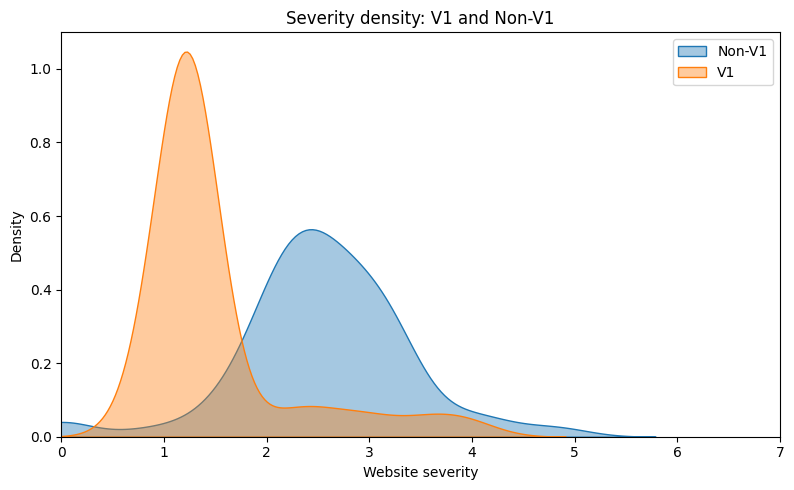

In [259]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    df_non["severity"],
    label="Non-V1",
    fill=True,
    alpha=0.4
)

sns.kdeplot(
    df_v1["severity"],
    label="V1",
    fill=True,
    alpha=0.4,

)

plt.xlabel("Website severity")
plt.ylabel("Density")
plt.title("Severity density: V1 and Non-V1")
plt.legend()
plt.tight_layout()
plt.xlim(0, 7)
plt.show()


In [269]:
t_stat, p_val = stats.ttest_ind(
    df_non["severity"],
    df_v1["severity"],
    equal_var=False,
    alternative="greater"
)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_val:.4g}")

t-statistic = 9.442
p-value = 2.171e-17
